# Comparing Custom LinearSVC vs Sklearn LinearSVC

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, load_breast_cancer, make_classification
from sklearn.svm import LinearSVC
from ml_lib import LinearSVC as CustomLinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from utils.helpers import (evaluate_metrics, train_time, cross_validate, 
                           plot_confusion_matrix, plot_decision_boundary)

## 1. Dataset Generation

In [3]:
# Synthetic dataset for visual decision boundary evaluation
X_vis, y_vis = make_classification(n_samples=200, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, flip_y=0.01, random_state=42)


scaler_blobs = StandardScaler()
X_vis = scaler_blobs.fit_transform(X_vis)

# Real-world medical dataset (binary classification)
X_bc, y_bc = load_breast_cancer(return_X_y=True)
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)

scaler_bc = StandardScaler()
X_train_bc = scaler_bc.fit_transform(X_train_bc)
X_test_bc = scaler_bc.transform(X_test_bc)


## 2. Model Training

In [4]:
csvc = CustomLinearSVC(C=1, learning_rate=1e-6)
svc = LinearSVC(C=1)

csvc.fit(X_train_bc, y_train_bc)
svc.fit(X_train_bc, y_train_bc)

train_time(csvc, X_train_bc, y_train_bc)
train_time(svc, X_train_bc, y_train_bc)

Model trained in 0.2258 seconds.
Model trained in 0.0006 seconds.


0.0006

## 3. Predictions & Evaluation

### 3.1. Accuracy, precision, recall, F1

In [5]:
y_pred_csvc = csvc.predict(X_test_bc)
y_pred_svc = svc.predict(X_test_bc)

display(evaluate_metrics(y_test_bc, y_pred_csvc, title="CustomLinearSVC Evaluation"))
display(evaluate_metrics(y_test_bc, y_pred_svc, title="SklearnLinearSVC Evaluation"))

,Model,Accuracy,Precision,Recall,F1
0,CustomLinearSVC Evaluation,0.973684,0.985714,0.971831,0.978723


,Model,Accuracy,Precision,Recall,F1
0,SklearnLinearSVC Evaluation,0.95614,0.971429,0.957746,0.964539


### 3.2. Confusion Matrix

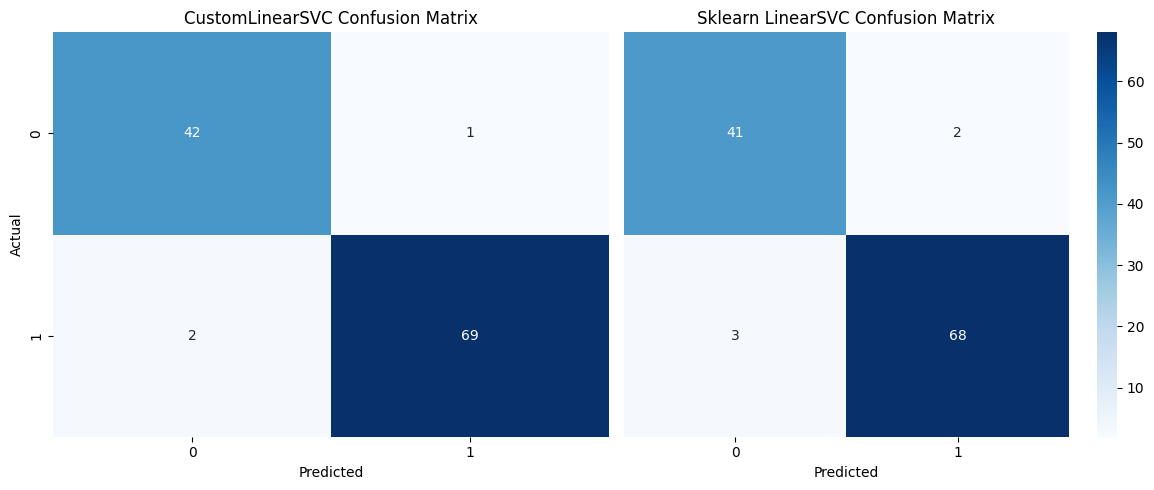

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 5))

plot_confusion_matrix(y_test_bc, y_pred_csvc, ax=ax1, title="CustomLinearSVC Confusion Matrix", cbar=False)
plot_confusion_matrix(y_test_bc, y_pred_svc, ax=ax2, title="Sklearn LinearSVC Confusion Matrix", yvisible=False) 

plt.tight_layout()
plt.show()

### 3.3. Decision Boundary

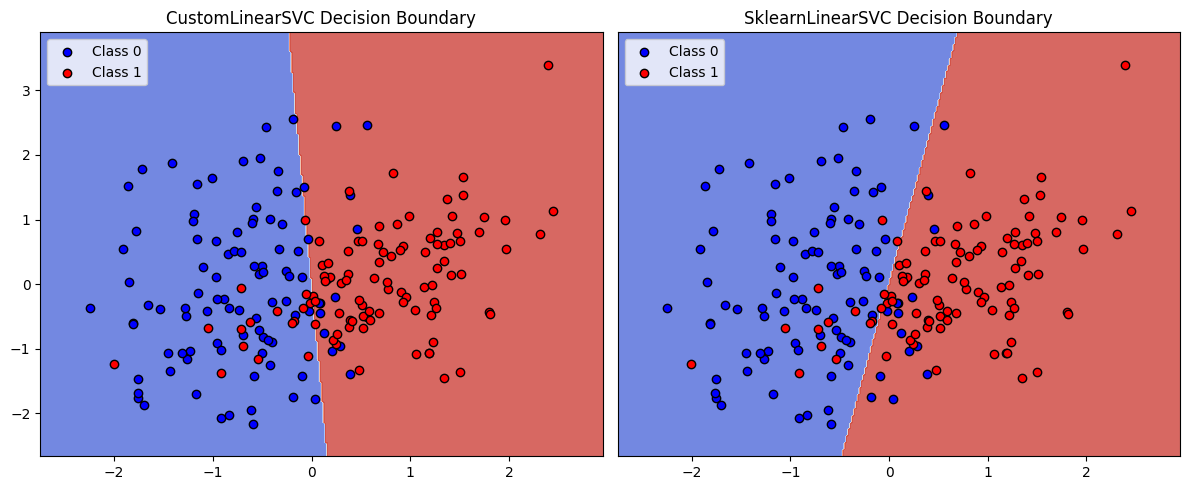

In [7]:
csvc.fit(X_vis, y_vis)
svc.fit(X_vis, y_vis)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 5))

plot_decision_boundary(svc, X_vis, y_vis, ax2, title="SklearnLinearSVC Decision Boundary", yvisible=False)
plot_decision_boundary(csvc, X_vis, y_vis, ax1, title="CustomLinearSVC Decision Boundary")

plt.tight_layout()
plt.show()

## 4. Cross-Validation

In [9]:
cross_validate(CustomLinearSVC, X_bc, y_bc, cv=4)


Fold 1:
Accuracy: 0.9580
Precision: 0.9882
Recall: 0.9438
F1: 0.9655

Fold 2:
Accuracy: 0.9225
Precision: 0.9394
Recall: 0.9490
F1: 0.9442

Fold 3:
Accuracy: 0.9155
Precision: 0.9524
Recall: 0.9091
F1: 0.9302

Fold 4:
Accuracy: 0.9577
Precision: 0.9524
Recall: 0.9756
F1: 0.9639


,accuracy,precision,recall,f1
0,0.938454,0.958098,0.944375,0.950942


In [10]:
cross_validate(LinearSVC, X_bc, y_bc, cv=4)


Fold 1:
Accuracy: 0.9650
Precision: 0.9884
Recall: 0.9551
F1: 0.9714

Fold 2:
Accuracy: 0.9718
Precision: 0.9896
Recall: 0.9694
F1: 0.9794

Fold 3:
Accuracy: 0.9648
Precision: 0.9560
Recall: 0.9886
F1: 0.9721

Fold 4:
Accuracy: 0.9366
Precision: 0.9195
Recall: 0.9756
F1: 0.9467


,accuracy,precision,recall,f1
0,0.959569,0.963385,0.972173,0.967406
